In [291]:
import requests
import lxml.html as lx
import re
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import requests
import lxml.html as lx
base_link = 'https://tracker.gg'
challengers_prof = []
for i in range(2):
    response = requests.get(f'https://tracker.gg/lol/leaderboards/stats/all/LeaguePoints?region=NA&queueType=RANKED_SOLO_5x5&page={i}')
    page = lx.fromstring(response.text)
    curr_challengers = page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[2]/div/div/div[1]/div/table/tbody/tr//div[contains(@class, "text")]/a/@href')
    for link in curr_challengers:
        if link.startswith('/lol/profile'):
            challengers_prof.append(base_link + link)

In [34]:
players_df = pd.DataFrame(columns=['Position', 'Matches Played', 'K/D/A', 'Win Rate', 'Kill Participation', 'Objective Participation'])

In [10]:
for prof in challengers_prof:
    time.sleep(5)
    response = requests.get(prof)
    page = lx.fromstring(response.text)
    try:
        top_position = page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[1]/div[2]/div/div[1]/div[2]/div[1]/text()')[0]
        matches_played = page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[1]/div/div/div/div/span[2]/text()')[0].strip()
        matches_played = int(re.sub(r'\D', '', matches_played))
        kda = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[3]/div[1]/div/div[2]/span[2]/span/text()')[0])
        winrate = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/span[2]/text()')[0].replace('%', ''))
        kill_participation = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[2]/div[2]/text()')[0].replace('%', ''))
        objective_participation = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[3]/div[2]/text()')[0].replace('%', ''))
        curr_player = {'Position': top_position, 'Matches Played': matches_played, 'K/D/A': kda, 'Win Rate': winrate, 'Kill Participation': kill_participation, 'Objective Participation': objective_participation}
        curr_player_df = pd.DataFrame([curr_player], columns=['Position', 'Matches Played', 'K/D/A', 'Win Rate', 'Kill Participation', 'Objective Participation'])
        players_df = pd.concat([players_df, curr_player_df], ignore_index=True)
    except Exception as e:
        print(prof)


In [14]:
players_df

,Position,Matches Played,K/D/A,Win Rate,Kill Participation,Objective Participation
0,Middle,247,3.65,66.8,54.1,49.3
1,Jungle,191,4.19,69.6,62.4,76.9
2,Jungle,516,2.90,55.6,59.9,72.9
3,Top,593,2.64,54.3,42.0,42.6
4,Jungle,356,3.59,56.2,63.0,74.7
...,...,...,...,...,...,...
95,Bottom,275,3.33,55.3,48.8,48.4
96,Middle,233,1.90,57.5,47.9,32.5
97,Support,356,3.24,53.4,57.8,30.1
98,Support,274,4.07,59.1,64.0,54.6


In [15]:
players_df.to_csv('challenger_players_df.csv') #export so don't have to run code everytime git pull

In [91]:
riot_api = 'RGAPI-285344e4-f5a0-4baa-82ac-6fe59e537a4e'

In [92]:
link = 'https://na1.api.riotgames.com/lol/league/v4/entries/RANKED_SOLO_5x5/PLATINUM/IV?page=1&api_key=RGAPI-285344e4-f5a0-4baa-82ac-6fe59e537a4e'
response = requests.get(link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com"
})

In [93]:
plat_summoners = response.json()
plat_summoners

[{'leagueId': 'a8d9bcb1-1df5-4743-a197-8a33249b052a',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'PLATINUM',
  'rank': 'IV',
  'summonerId': 'qXSjj3H1P-ixuaSND2f23qsIKsu9qnFlh4y0Yl0udaUx2jKP',
  'summonerName': 'big grammy',
  'leaguePoints': 0,
  'wins': 35,
  'losses': 23,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False},
 {'leagueId': 'f885eea3-e3c8-4dad-8cc1-ed3b524b66cc',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'PLATINUM',
  'rank': 'IV',
  'summonerId': 'ni8oRtiJPZv71mkfzemrCWSmqFG7iN4cYAiRXRZcokYKksgQ',
  'summonerName': 'WhoAmIIAmWho',
  'leaguePoints': 75,
  'wins': 43,
  'losses': 42,
  'veteran': False,
  'inactive': False,
  'freshBlood': False,
  'hotStreak': False},
 {'leagueId': '83146289-4e30-4715-b353-9e42101f558a',
  'queueType': 'RANKED_SOLO_5x5',
  'tier': 'PLATINUM',
  'rank': 'IV',
  'summonerId': 'xRB5poO_mAkbfdV_c2sqTJf89XQnmEnBVBjPciqkrIppquey',
  'summonerName': 'AHS J1mmy',
  'leaguePoints': 43,
  'wins': 42,
  'losse

In [ ]:
plat_summoners = response.json()
plat_summoner_names = {}
for summoner in plat_summoners[:200]:
    summoner_name = summoner['summonerName'].replace(' ', '%20')
    plat_summoner_names[summoner_name] = 0
plat_summoner_names

In [ ]:
for summoner in list(plat_summoner_names.keys())[100:200]: #Rate limits only 100 requests per 2 minutes
    link = f'https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{summoner}'
    response = requests.get(link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": "RGAPI-285344e4-f5a0-4baa-82ac-6fe59e537a4e"
    })
    response = response.json()
    plat_summoner_names[summoner] = response['puuid']
plat_summoner_names

In [171]:
full_id = [] #list containing full id's that are modified for easy link searches

In [ ]:
for name, ppuid in list(plat_summoner_names.items())[:100]: #rate limiting
    link = f'https://americas.api.riotgames.com/riot/account/v1/accounts/by-puuid/{ppuid}'
    response = requests.get(link, headers={
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": "RGAPI-285344e4-f5a0-4baa-82ac-6fe59e537a4e"
    })
    tagline = '%23' + response.json()['tagLine']
    full_id.append(name + tagline)
full_id

In [112]:
plat_players_df = pd.DataFrame(columns=['Position', 'Matches Played', 'K/D/A', 'Win Rate', 'Kill Participation', 'Objective Participation'])

In [ ]:
counter = 0
while len(plat_players_df) < 100:
    link = f'https://tracker.gg/lol/profile/riot/NA/{full_id[counter]}/overview?playlist=RANKED_SOLO_5x5'
    response = requests.get(link)
    page = lx.fromstring(response.text)
    try:
        top_position = page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[1]/div[2]/div/div[1]/div[2]/div[1]/text()')[0]
        matches_played = page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[1]/div/div/div/div/span[2]/text()')[0].strip()
        matches_played = int(re.sub(r'\D', '', matches_played))
        kda = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[3]/div[1]/div/div[2]/span[2]/span/text()')[0])
        winrate = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[1]/div[2]/div/div/div[1]/div[2]/span[2]/text()')[0].replace('%', ''))
        kill_participation = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[2]/div[2]/text()')[0].replace('%', ''))
        objective_participation = float(page.xpath('//*[@id="app"]/div[2]/div[3]/div/main/div[3]/div[3]/div[2]/div[2]/div[2]/div[2]/div[2]/div[3]/div[2]/text()')[0].replace('%', ''))
        curr_player = {'Position': top_position, 'Matches Played': matches_played, 'K/D/A': kda, 'Win Rate': winrate, 'Kill Participation': kill_participation, 'Objective Participation': objective_participation}
        curr_player_df = pd.DataFrame([curr_player], columns=['Position', 'Matches Played', 'K/D/A', 'Win Rate', 'Kill Participation', 'Objective Participation'])
        plat_players_df = pd.concat([plat_players_df, curr_player_df], ignore_index=True)
    except Exception as e:
        print(id)
    counter += 1


In [301]:
plat_players_df

,Position,Matches Played,K/D/A,Win Rate,Kill Participation,Objective Participation
0,Middle,37,3.31,48.6,47.7,42.4
1,Top,60,1.60,45.0,41.4,39.3
2,Support,12,4.36,41.7,58.8,59.8
3,Top,4,2.79,50.0,54.1,48.0
4,Top,49,1.88,55.1,39.9,53.2
...,...,...,...,...,...,...
95,Jungle,66,2.45,49.7,49.4,48.7
96,Middle,9,2.33,55.6,40.1,37.8
97,Bottom,4,3.32,50.0,60.3,51.9
98,Top,6,1.60,50.0,44.4,33.1


In [281]:
challenger_players_df = players_df
challenger_players_df

,Position,Matches Played,K/D/A,Win Rate,Kill Participation,Objective Participation
0,Middle,247,3.65,66.8,54.1,49.3
1,Jungle,191,4.19,69.6,62.4,76.9
2,Jungle,516,2.90,55.6,59.9,72.9
3,Top,593,2.64,54.3,42.0,42.6
4,Jungle,356,3.59,56.2,63.0,74.7
...,...,...,...,...,...,...
95,Bottom,275,3.33,55.3,48.8,48.4
96,Middle,233,1.90,57.5,47.9,32.5
97,Support,356,3.24,53.4,57.8,30.1
98,Support,274,4.07,59.1,64.0,54.6


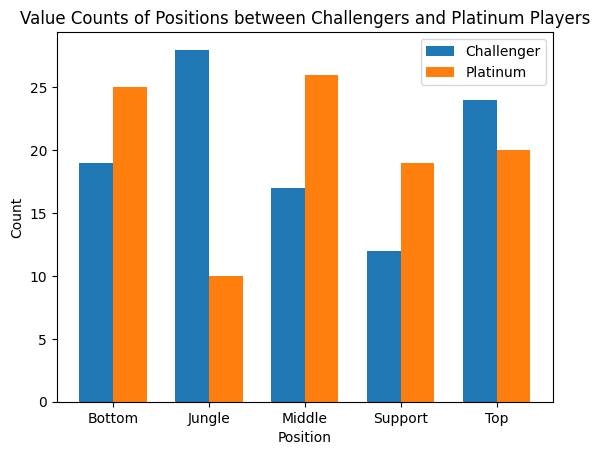

In [305]:
#Plot for positions played
challenger_positions_counts = challenger_players_df['Position'].value_counts().sort_index()
plat_position_counts = plat_players_df['Position'].value_counts().sort_index()
bar_width = 0.35
index = np.arange(5)
plt.bar(index, challenger_positions_counts, width=bar_width, label='Challenger')
plt.bar(index + bar_width, plat_position_counts, width=bar_width, label='Platinum')

plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Value Counts of Positions between Challengers and Platinum Players')
plt.xticks(index + bar_width/2, challenger_positions_counts.index)
plt.legend()
plt.show()

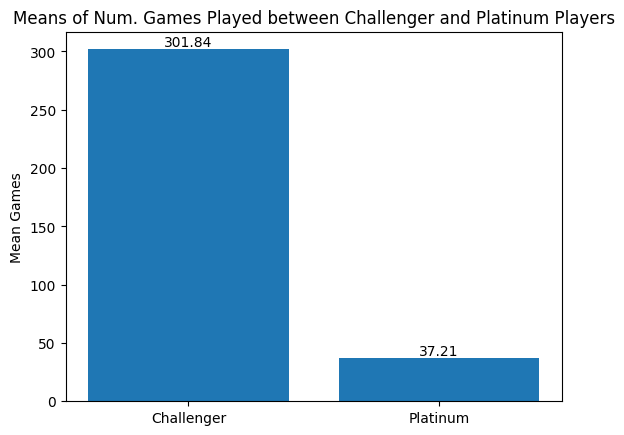

In [313]:
#Plot for matches played
challenger_matches = challenger_players_df['Matches Played'].mean()
plat_matches = plat_players_df['Matches Played'].mean()
fig, ax = plt.subplots()
bars = ax.bar(['Challenger', 'Platinum'], [challenger_matches, plat_matches])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.ylabel('Mean Games')
plt.title('Means of Num. Games Played between Challenger and Platinum Players')
plt.show()

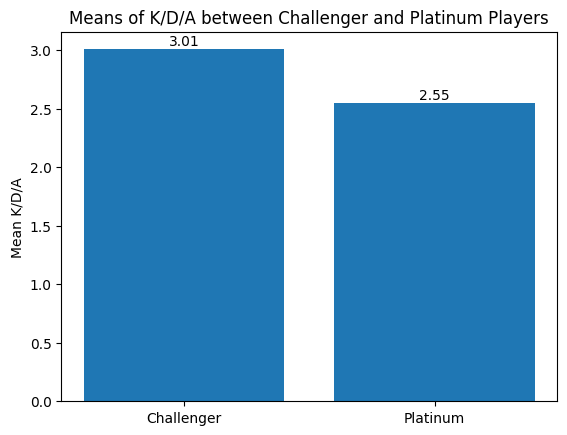

In [315]:
#Plot for K/D/A
challenger_kda = challenger_players_df['K/D/A'].mean()
plat_kda = plat_players_df['K/D/A'].mean()
fig, ax = plt.subplots()
bars = ax.bar(['Challenger', 'Platinum'], [challenger_kda, plat_kda])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
plt.ylabel('Mean K/D/A')
plt.title('Means of K/D/A between Challenger and Platinum Players')
plt.show()

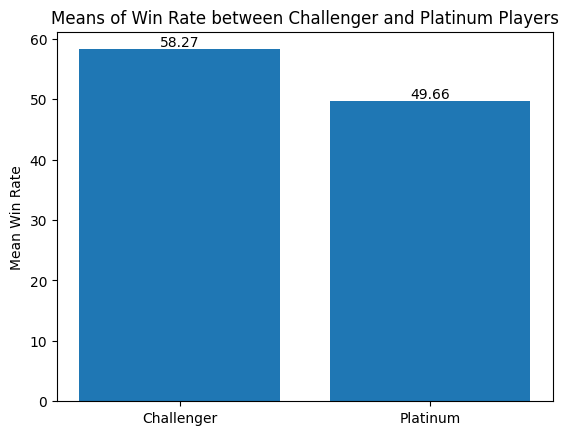

In [316]:
#Plot for Win Rate
challenger_winrate = challenger_players_df['Win Rate'].mean()
plat_winrate = plat_players_df['Win Rate'].mean()
fig, ax = plt.subplots()
bars = ax.bar(['Challenger', 'Platinum'], [challenger_winrate, plat_winrate])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
plt.ylabel('Mean Win Rate')
plt.title('Means of Win Rate between Challenger and Platinum Players')
plt.show()

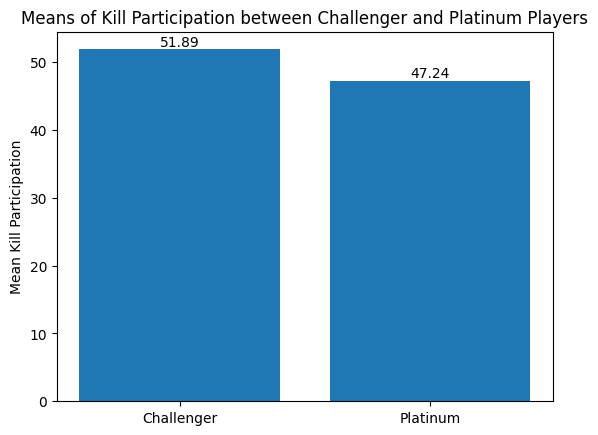

In [318]:
#Plot for Kill Participation
challenger_kp = challenger_players_df['Kill Participation'].mean()
plat_kp = plat_players_df['Kill Participation'].mean()
fig, ax = plt.subplots()
bars = ax.bar(['Challenger', 'Platinum'], [challenger_kp, plat_kp])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
plt.ylabel('Mean Kill Participation')
plt.title('Means of Kill Participation between Challenger and Platinum Players')
plt.show()

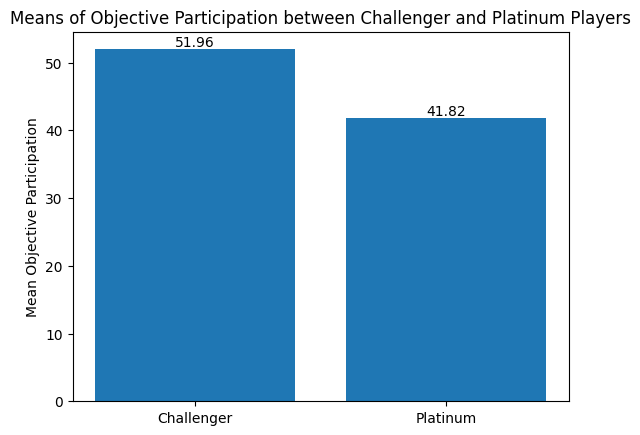

In [319]:
# Plot for Objective Participation
challenger_op = challenger_players_df['Objective Participation'].mean()
plat_op = plat_players_df['Objective Participation'].mean()
fig, ax = plt.subplots()
bars = ax.bar(['Challenger', 'Platinum'], [challenger_op, plat_op])
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')
plt.ylabel('Mean Objective Participation')
plt.title('Means of Objective Participation between Challenger and Platinum Players')
plt.show()

In [304]:
plat_players_df.to_csv('plat_players_df.csv') #save dataframe so don't have to run again